<a href="https://colab.research.google.com/github/PriyankaGona/machinelearning-assignments/blob/master/hw1_problem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD    
from keras.metrics import categorical_crossentropy
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [0]:
# variable initialization
batch_size = 128
nb_classes=10
nb_epoch=20

In [0]:
# loading mnist dataset using keras
(x_train,y_train), (x_test,y_test) = mnist.load_data()

# reshaping the image to 1-dimensional vector 
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# normalization
x_train /=255
x_test /=255

# converting y_traing shape from (60000,1) to (60000,10)
y_train=np_utils.to_categorical(y_train,nb_classes)
y_test=np_utils.to_categorical(y_test,nb_classes)

In [10]:
# creating a model
model = Sequential()
# adding Dense layer to model
model.add(Dense(10, activation='softmax'))

# compiling model with sgd optimizer and categorical_crossentropy function
sgd = SGD(lr=0.005)
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd, metrics=['accuracy'])

# training the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, shuffle=True)

# testing the model
score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100*score[1]

print('Test accuracy: %.4f%%' % accuracy)

Epoch 1/20
60000/60000 [==============================] - 1s 19us/step - loss: 1.6033 - acc: 0.5656
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.9728 - acc: 0.7920
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.7702 - acc: 0.8286
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.6701 - acc: 0.8451
Epoch 5/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.6093 - acc: 0.8545
Epoch 6/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.5679 - acc: 0.8612
Epoch 7/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.5376 - acc: 0.8665
Epoch 8/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.5142 - acc: 0.8709
Epoch 9/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.4956 - acc: 0.8741
Epoch 10/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.4802 - acc: 0.8773

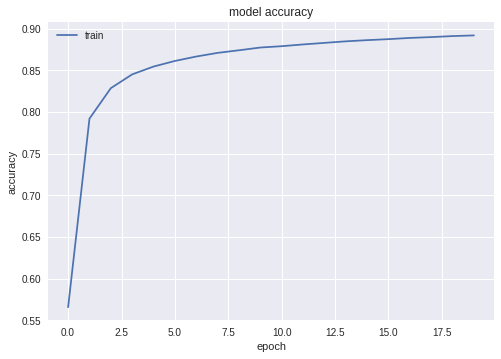

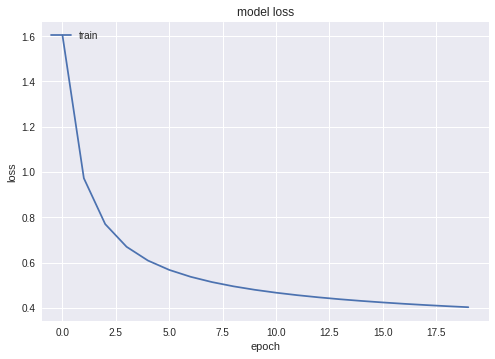

In [11]:
# plotting accuracy values of model
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# plotting loss values of model
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()